<a href="https://colab.research.google.com/github/geethaprakash2020/Basic-python-programming/blob/master/californiaHousing__using__keras_pranali's_class_7th_feb_2021_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

In [ ]:
from tensorflow import keras

In [ ]:
keras.__version__

'2.4.0'

<p><h3><b><font color = 'DarkBlue'> Regression MLP on California Housing Dataset </font></b></h3></p>

The California Housing Dataset fron scikit learn library is simpler than the original dataset since it contains only numerical features (there is no ocean_proximity feature), and there is no missing value.

## **California Housing Dataset**

Data Set Characteristics:
Number of Instances: 20640
Number of Attributes: 8 numeric, predictive attributes and the target
Attribute Information:
1. MedInc: median income in block
2. HouseAge: median house age in block
3. AveRooms: average number of rooms
4. AveBedrms: average number of bedrooms
5. Population: block population
6. AveOccup: average house occupancy
7. Latitude: house block latitude
8. Longitude: house block longitude
9. Missing Attribute Values: None

This dataset was obtained from the StatLib repository. http://lib.stat.cmu.edu/datasets/
The target variable is the median house value for California districts.
This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). It can be downloaded/loaded using the func:
`sklearn.datasets.fetch_california_housing` function.
References: Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,Statistics and Probability Letters, 33 (1997) 291-297'

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
housing = fetch_california_housing()

In [ ]:
housing.data.shape

(20640, 8)

In [ ]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

<p><h3><b><font color='DarkBlue'> Data Preprocessing </font></b></h3></p>

After loading the data, we split it into a training set, a validation
set and a test set, and we scale all the features. 

In [ ]:
X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target,random_state=42)    # Split the dataset into train and test dataset 

In [ ]:
X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape

((15480, 8), (5160, 8), (15480,), (5160,))

In [ ]:
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,random_state=42)   # split the train dataset into validation dataset 

In [ ]:
X_train.shape,X_valid.shape,y_train.shape,y_valid.shape  #split train data into train data and validation data

((11610, 8), (3870, 8), (11610,), (3870,))

In [ ]:
X_train[:5,:]

array([[ 3.52140000e+00,  1.50000000e+01,  3.04994451e+00,
         1.10654828e+00,  1.44700000e+03,  1.60599334e+00,
         3.76300000e+01, -1.22430000e+02],
       [ 5.32750000e+00,  5.00000000e+00,  6.49005964e+00,
         9.91053678e-01,  3.46400000e+03,  3.44333996e+00,
         3.36900000e+01, -1.17390000e+02],
       [ 3.10000000e+00,  2.90000000e+01,  7.54237288e+00,
         1.59152542e+00,  1.32800000e+03,  2.25084746e+00,
         3.84400000e+01, -1.22980000e+02],
       [ 7.17360000e+00,  1.20000000e+01,  6.28900256e+00,
         9.97442455e-01,  1.05400000e+03,  2.69565217e+00,
         3.35500000e+01, -1.17700000e+02],
       [ 2.05490000e+00,  1.30000000e+01,  5.31245745e+00,
         1.08509190e+00,  3.29700000e+03,  2.24438393e+00,
         3.39300000e+01, -1.16930000e+02]])

In [ ]:
X_valid[:5,:]

array([[ 2.50000000e+00,  3.40000000e+01,  3.60640000e+00,
         1.00800000e+00,  2.98400000e+03,  4.77440000e+00,
         3.37400000e+01, -1.17860000e+02],
       [ 2.87500000e+00,  4.90000000e+01,  5.26461538e+00,
         1.07076923e+00,  1.13800000e+03,  3.50153846e+00,
         3.77100000e+01, -1.22460000e+02],
       [ 1.74520000e+00,  2.40000000e+01,  3.33811475e+00,
         1.20286885e+00,  1.01200000e+03,  2.07377049e+00,
         3.27600000e+01, -1.17060000e+02],
       [ 5.20340000e+00,  2.90000000e+01,  5.64549180e+00,
         1.04098361e+00,  2.04600000e+03,  4.19262295e+00,
         3.38100000e+01, -1.18280000e+02],
       [ 4.74400000e+00,  4.80000000e+01,  7.11764706e+00,
         1.08823529e+00,  6.10000000e+02,  2.56302521e+00,
         3.78000000e+01, -1.22190000e+02]])

In [ ]:
scaler = StandardScaler()  # perform scaling using StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)  #we will standardise the data using train data hence we will use fit transform for tyrain data
X_valid_scaled = scaler.transform(X_valid)     #will use only transform
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train_scaled.shape, X_valid_scaled.shape, X_test_scaled.shape

((11610, 8), (3870, 8), (5160, 8))

In [ ]:
y_train.shape, y_test.shape  #indicates its a vector/1-D array ,

((11610,), (5160,))

In [ ]:
y_train_scaled = scaler.fit_transform(y_train.reshape(-1,1)) #we will standardise the data using train data hence we will use fit transform for train data and will convert to array(2D array) since its avector(1d array)
y_valid_scaled = scaler.transform(y_valid.reshape(-1,1))
y_test_scaled = scaler.transform(y_test.reshape(-1,1))

In [ ]:
y_train_scaled.shape, y_valid_scaled.shape, y_test_scaled.shape

((11610, 1), (3870, 1), (5160, 1))

In [ ]:
X_train_scaled

array([[-0.19397883, -1.07781319, -0.94338545, ..., -0.57291624,
         0.92926047, -1.42215523],
       [ 0.75198318, -1.868895  ,  0.40547793, ...,  0.20516532,
        -0.91654738,  1.09666969],
       [-0.41469108,  0.02970134,  0.81808819, ..., -0.29983271,
         1.30872858, -1.697027  ],
       ...,
       [-1.22332336,  0.50435042, -0.51600328, ...,  0.1344908 ,
        -0.71978613,  1.14664638],
       [-0.93556989,  1.8491895 , -0.10878451, ..., -0.01354498,
         0.52168361, -0.10277075],
       [ 0.89585991,  0.1879177 ,  0.29947528, ..., -0.17823425,
         1.12133692, -1.30720885]])

In [ ]:
X_valid_scaled

array([[-0.72894678,  0.42524224, -0.72520018, ...,  0.76884409,
        -0.89312342,  0.86177927],
       [-0.53253697,  1.61186495, -0.07501671, ...,  0.22981129,
         0.96673881, -1.43714823],
       [-1.12428044, -0.36583956, -0.83039438, ..., -0.37482146,
        -1.35223299,  1.26159275],
       ...,
       [-0.38169423, -0.2076232 , -0.46608538, ...,  0.05940227,
        -0.64482947,  0.43697745],
       [-0.75078755,  0.50435042, -0.67205695, ..., -0.3343433 ,
        -1.15078695,  1.10166736],
       [-0.07665671,  0.10880952, -0.42690329, ..., -0.15910745,
        -0.87438425,  0.8567816 ]])

In [ ]:
import numpy as np
#np.random.seed(42)
#tf.random.set_seed(42)

<p><h3><b><font color='DarkBlue'> Building a Sequential Model </font></b></h3></p>

We are going to create a simple model with one hidden layer of 32 neurons. 

The main differences are the fact that the output layer has a single neuron (since we only want to predict a single value) and uses no activation function, and the loss function is the mean squared error.

In [ ]:
model = keras.models.Sequential()     # create an instance of sequential model 

In [ ]:
 model.add(keras.layers.Dense(32,input_shape=(8,),activation="relu")) # Add a hidden layer with 32 neurons and "relu" activtaion function.Adding 32 neurons with all features

In [ ]:
model.add(keras.layers.Dense(32,activation="relu"))

In [ ]:
model.summary()   # view the model details describing the hidden layer. A shape tuple (a tuple of integers or None entries, where None indicates that any positive integer may be expected).

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
Total params: 1,344
Trainable params: 1,344
Non-trainable params: 0
_________________________________________________________________


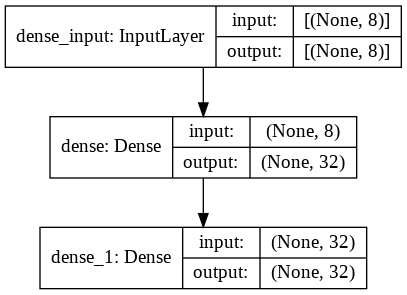

In [ ]:
from keras.utils.vis_utils import plot_model  #pictorial representation of summary
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
#summary in pictorial representation

In [ ]:
model.add(keras.layers.Dense(1))   # Add the output layer with one neuron . since its linear ie(x*w) we will not use any function

In [ ]:
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


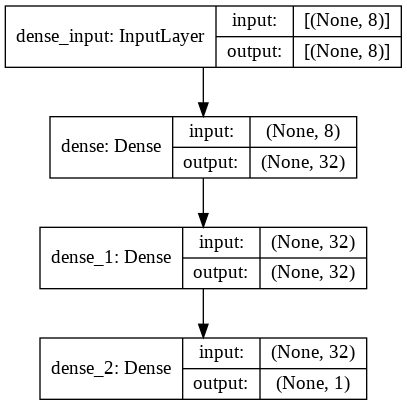

In [ ]:
from keras.utils.vis_utils import plot_model  #pictorial representation of summary
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
#summary in pictorial representation


<p><h3><b><font color='DarkBlue'> Compile the Model </font></b></h3></p>

Before training a model, we need to configure the learning process, which is done via the compile method. It receives the following arguments:

1. Optimizer : we are going to use Stochastic Gradient Descent optimizer with a learning rate of 0.001

2. Loss Function: The loss function used is mean_squared_error as it is regression problem.

In [ ]:
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(learning_rate=0.001)) #default learning rate is 0.1 here we are changing it to 0.001(lower) . Since it is a regression problem , metrics and loss function both are mean squared error we are onmly use MSE

<p><h3><b><font color='DarkBlue'> Fit the Model </font></b></h3></p>

For training a model, we use fit(). The fit() trains the model for a fixed number of epochs (iterations on a dataset).

It takes following arguments:

1. Input Data
2. Target Data
3. batch_size : Number of samples per gradient update.
4. epochs : Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.
5. validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.
6. validation_data: Data on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data. 
7. callbacks: List of keras.callbacks.Callback instances. List of callbacks to apply during training and validation. 
8. verbose: Integer. 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.

In [ ]:
history = model.fit(X_train_scaled,y_train_scaled,epochs=30,batch_size=100,validation_data=(X_valid_scaled,y_valid_scaled),verbose=1)  #verbose will print the details of the training data

Epoch 1/30
117/117 [==============================] - 1s 5ms/step - loss: 1.0840 - val_loss: 2.4069
Epoch 2/30
117/117 [==============================] - 0s 2ms/step - loss: 0.9460 - val_loss: 1.8966
Epoch 3/30
117/117 [==============================] - 0s 2ms/step - loss: 0.8173 - val_loss: 1.3977
Epoch 4/30
117/117 [==============================] - 0s 2ms/step - loss: 0.7620 - val_loss: 1.0393
Epoch 5/30
117/117 [==============================] - 0s 2ms/step - loss: 0.6778 - val_loss: 0.8214
Epoch 6/30
117/117 [==============================] - 0s 2ms/step - loss: 0.6255 - val_loss: 0.6588
Epoch 7/30
117/117 [==============================] - 0s 2ms/step - loss: 0.5700 - val_loss: 0.5600
Epoch 8/30
117/117 [==============================] - 0s 2ms/step - loss: 0.5485 - val_loss: 0.5069
Epoch 9/30
117/117 [==============================] - 0s 2ms/step - loss: 0.5315 - val_loss: 0.4838
Epoch 10/30
117/117 [==============================] - 0s 2ms/step - loss: 0.5079 - val_loss: 0.4877

<p><h3><b><font color='DarkBlue'> Accessing Model Training History </font></b></h3></p>
Keras provides the capability to register callbacks when training a deep learning model.

One of the default callbacks that is registered when training all deep learning models is the History callback. It records training metrics for each epoch. This includes the loss and the accuracy (for classification problems) as well as the loss and accuracy for the validation dataset, if one is set.

The history object is returned from calls to the fit() function used to train the model. Metrics are stored in a dictionary in the history member of the object returned.

In [ ]:
history.history 

{'loss': [1.0493322610855103,
  0.9089610576629639,
  0.8086847066879272,
  0.7284955382347107,
  0.6643665432929993,
  0.6133778095245361,
  0.573383629322052,
  0.5428022146224976,
  0.5191143155097961,
  0.5016740560531616,
  0.48758554458618164,
  0.4761597216129303,
  0.4664897322654724,
  0.4587346315383911,
  0.45150938630104065,
  0.44489574432373047,
  0.43842613697052,
  0.4333867132663727,
  0.42787694931030273,
  0.42313167452812195,
  0.41841164231300354,
  0.4137765169143677,
  0.40948349237442017,
  0.40567684173583984,
  0.40158811211586,
  0.3978475332260132,
  0.39399254322052,
  0.39070048928260803,
  0.38708800077438354,
  0.38384243845939636],
 'val_loss': [2.406921148300171,
  1.8966001272201538,
  1.3976600170135498,
  1.039302110671997,
  0.821381688117981,
  0.6587614417076111,
  0.5599704384803772,
  0.506855309009552,
  0.48375770449638367,
  0.4877127408981323,
  0.502229630947113,
  0.4992128908634186,
  0.5513271689414978,
  0.5487954616546631,
  0.5554264

<p><h3><b><font color= 'DarkBlue'> Evaluate a Model </font></b></h3></p>

Returns the loss value & metrics values for the model in test mode.

Computation is done in batches.

In [ ]:
mse_test = model.evaluate(X_test_scaled,y_test_scaled, batch_size=512)

11/11 [==============================] - 0s 2ms/step - loss: 0.3768


In [ ]:
mse_test

0.3768218755722046

In [ ]:
y_pred_test=model.predict(X_test_scaled)  # perform prediction 

In [ ]:
y_pred_test  # output will be scaled values

array([[-1.0238941 ],
       [-0.3038017 ],
       [ 0.8649922 ],
       ...,
       [-0.5434716 ],
       [ 0.47088012],
       [ 1.4528396 ]], dtype=float32)

In [ ]:
import numpy as np

In [ ]:
rmse_test = np.sqrt(mse_test)
rmse_test

0.6138581884867258

In [ ]:
y_test_scaled

array([[-1.38648376],
       [-1.40289569],
       [ 2.52042828],
       ...,
       [-0.78183366],
       [ 0.47411096],
       [ 2.36061926]])

In [ ]:
SSE = np.sum((y_test_scaled - y_pred_test)**2)
SSE

1944.400860130845

In [ ]:
SST = np.sum((np.mean(y_train)- y_test_scaled )**2)
SST

27817.14354318859

In [ ]:
r2 = 1 - SSE/SST
r2

0.9301006281571654

## Model using Functional API

In [ ]:
inp = keras.layers.Input(shape=(8,))
h1 = keras.layers.Dense(32,activation='relu')(inp)
h2 = keras.layers.Dense(32,activation='relu')(h1)
out = keras.layers.Dense(1)(h2)
model_fapi = keras.models.Model(inputs=inp, outputs=out)

In [ ]:
model_fapi.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


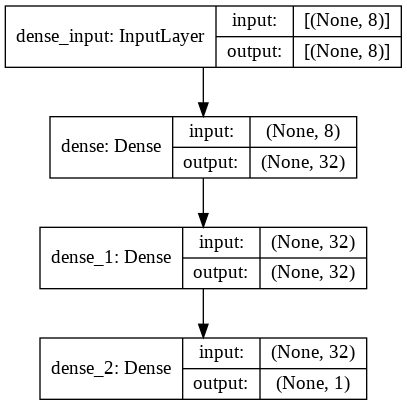

In [ ]:
from keras.utils.vis_utils import plot_model  #pictorial representation of summary
plot_model(model, to_file='model_fapi.png', show_shapes=True, show_layer_names=True)
#summary in pictorial representation

In [ ]:
model_fapi.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(learning_rate=0.01))

In [ ]:
model_fapi.fit(X_train_scaled,y_train_scaled,epochs=10, batch_size=100, validation_data=(X_valid_scaled,y_valid_scaled))

Epoch 1/10
117/117 [==============================] - 1s 3ms/step - loss: 0.8307 - val_loss: 0.5594
Epoch 2/10
117/117 [==============================] - 0s 2ms/step - loss: 0.4861 - val_loss: 0.6194
Epoch 3/10
117/117 [==============================] - 0s 2ms/step - loss: 0.4221 - val_loss: 0.4093
Epoch 4/10
117/117 [==============================] - 0s 2ms/step - loss: 0.3836 - val_loss: 0.4816
Epoch 5/10
117/117 [==============================] - 0s 2ms/step - loss: 0.3509 - val_loss: 0.9901
Epoch 6/10
117/117 [==============================] - 0s 2ms/step - loss: 0.3471 - val_loss: 0.7701
Epoch 7/10
117/117 [==============================] - 0s 2ms/step - loss: 0.3123 - val_loss: 1.1362
Epoch 8/10
117/117 [==============================] - 0s 2ms/step - loss: 0.3412 - val_loss: 1.1522
Epoch 9/10
117/117 [==============================] - 0s 2ms/step - loss: 0.3003 - val_loss: 0.6120
Epoch 10/10
117/117 [==============================] - 0s 2ms/step - loss: 0.2909 - val_loss: 0.4115

In [ ]:
mse_test=model_fapi.evaluate(X_test_scaled,y_test_scaled)

162/162 [==============================] - 0s 917us/step - loss: 0.2875


In [ ]:
rmse_test_fapi = np.sqrt(mse_test)
rmse_test_fapi

0.5362314713662715

<p><h3><b><font color= 'DarkBlue'> Perform Predictions on Test Data </font></b></h3></p>

Generates output predictions for the input samples.

Computation is done in batches.

In [ ]:
y_pred_fapi=model_fapi.predict(X_test_scaled)
y_pred_fapi

array([[-1.1732167 ],
       [-0.34764102],
       [ 1.2950575 ],
       ...,
       [-0.57754594],
       [ 0.27286288],
       [ 1.5318167 ]], dtype=float32)

In [ ]:
sse_fapi = np.sum((y_test_scaled-y_pred_fapi)**2)
sse_fapi

1483.7284211466524

In [ ]:
sst = np.sum((y_test_scaled-np.mean(y_train))**2)
sst

27817.14354318859

<p><h3><b><font color= 'DarkBlue'> Computing R2 for model </font></b></h3></p>

In [ ]:
r2 = 1 - (sse_fapi/sst)
r2

0.9466613666193644

## Complex model using functional API

In [ ]:
input_A = keras.layers.Input(shape=(2,))
input_B = keras.layers.Input(shape=(8,))
hidden1 = keras.layers.Dense(32, activation="relu")(input_B)
hidden2 = keras.layers.Dense(32, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model_wide_deep1 = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
model_wide_deep1.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 32)           288         input_3[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 32)           1056        dense_6[0][0]                    
____________________________________________________________________________________________

In [ ]:
X_train_A, X_train_B = X_train_scaled[:,6:], X_train_scaled[:,:]  #creating input A(  all rows and 2 features) and input B(all varioables)
X_train_A.shape, X_train_B.shape

((11610, 2), (11610, 8))

In [ ]:
X_valid_A, X_valid_B = X_valid_scaled[:,6:], X_valid_scaled[:,:]
X_valid_A.shape, X_valid_B.shape

((3870, 2), (3870, 8))

In [ ]:
X_test_A, X_test_B = X_test_scaled[:,6:], X_test_scaled[:,:]
X_test_A.shape, X_test_B.shape

((5160, 2), (5160, 8))

In [ ]:
model_wide_deep1.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(learning_rate=0.01))

In [ ]:
model_wide_deep1.fit((X_train_A, X_train_B), y_train, epochs=30, batch_size=512)

Epoch 1/30
23/23 [==============================] - 0s 2ms/step - loss: 2.6058
Epoch 2/30
23/23 [==============================] - 0s 1ms/step - loss: 0.9488
Epoch 3/30
23/23 [==============================] - 0s 1ms/step - loss: 0.7695
Epoch 4/30
23/23 [==============================] - 0s 2ms/step - loss: 0.6903
Epoch 5/30
23/23 [==============================] - 0s 1ms/step - loss: 0.6727
Epoch 6/30
23/23 [==============================] - 0s 1ms/step - loss: 0.5962
Epoch 7/30
23/23 [==============================] - 0s 2ms/step - loss: 0.5650
Epoch 8/30
23/23 [==============================] - 0s 2ms/step - loss: 0.5256
Epoch 9/30
23/23 [==============================] - 0s 2ms/step - loss: 0.5105
Epoch 10/30
23/23 [==============================] - 0s 2ms/step - loss: 0.4945
Epoch 11/30
23/23 [==============================] - 0s 1ms/step - loss: 0.4531
Epoch 12/30
23/23 [==============================] - 0s 2ms/step - loss: 0.4665
Epoch 13/30
23/23 [==============================

In [ ]:
Evaluate and Predict

In [ ]:
mse_fapi=model_wide_deep1.evaluate([X_test_A,X_test_B],[y_test_scaled,y_test_scaled],batch_size=512)

11/11 [==============================] - 0s 1ms/step - loss: 4.6325


In [ ]:
rmse_fapi= np.sqrt(mse_fapi)
rmse_fapi

2.152316056919734

In [ ]:
y_pred_fapi=model_wide_deep1.predict([X_test_A,X_test_B])
y_pred_fapi

array([[0.7160646],
       [1.5992956],
       [3.5879467],
       ...,
       [1.5144478],
       [2.5211303],
       [3.8840141]], dtype=float32)

In [ ]:
sse_fapi=np.sum((y_test_scaled-y_pred_fapi)**2)
sse_fapi

23903.516580590298

In [ ]:
r2=1-sse_fapi/SST

In [ ]:
r2   #r2 value is too low. hence this model is not good

0.14069118766713196